<a href="https://colab.research.google.com/github/sho1106/3dmodel/blob/main/lecture02_kinematics_answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2025 Physical AI: Exercise 2

## Overview
This exercise focuses on understanding and applying various methods of representing and transforming positions and orientations in robotic systems. Topics include coordinate systems, position representation, and different rotation representations such as rotation matrices, Euler angles (RPY), axis-angle, and quaternions. We will also cover homogeneous transformation matrices, coordinate transformations, and rotation operations.

The practical component of the exercise includes transforming coordinates from a camera coordinate system to a world coordinate system and performing Hand-Eye calibration. These foundational skills are essential for tasks involving robot perception, motion planning, and control.

## Table of Contents
1. [Basics of Coordinate System](https://colab.research.google.com/drive/1nh-QHXd0wk82t3BYrSVICMWmLdS52ojo#scrollTo=uFOrbLNbz9Dh&line=2&uniqifier=1)
    1. Position of a Rigid Body
    2. Orientation of a Rigid Body
2. [Rotation Matrix](https://colab.research.google.com/drive/1nh-QHXd0wk82t3BYrSVICMWmLdS52ojo#scrollTo=9XVTyaYnz8dY&line=1&uniqifier=1)
    1. Properties of the Rotation Matrix
    2. Elementary Rotation Matrices
    3. Representation of a Vector
    4. Rotation of a Vector
3. [Composition of Rotation Matrices](https://colab.research.google.com/drive/1nh-QHXd0wk82t3BYrSVICMWmLdS52ojo#scrollTo=SaOx7-XMHI-g&line=1&uniqifier=1)
4. [Euler Angles](https://colab.research.google.com/drive/1nh-QHXd0wk82t3BYrSVICMWmLdS52ojo#scrollTo=mqeuvEhrHUyP&line=1&uniqifier=1)
    1. ZYZ Angles
    2. RPY Angles
5. [Angle and Axis](https://colab.research.google.com/drive/1nh-QHXd0wk82t3BYrSVICMWmLdS52ojo#scrollTo=mLFGc2aufx11)
6. [Unit Quaternion](https://colab.research.google.com/drive/1nh-QHXd0wk82t3BYrSVICMWmLdS52ojo#scrollTo=bUOqmYlFgS-5)
7. [Homogeneous Transformations](https://colab.research.google.com/drive/1nh-QHXd0wk82t3BYrSVICMWmLdS52ojo#scrollTo=HUBAXSN2gjqC)
8. [Direct Kinematics](https://colab.research.google.com/drive/1nh-QHXd0wk82t3BYrSVICMWmLdS52ojo#scrollTo=PrWMr0XaglYM)
    1. Open Chain
    2. Denavit–Hartenberg Convention
    3. Step-by-Step Computation of Direct Kinematics
9. [Kinematics of Typical Manipulator Structures](https://colab.research.google.com/drive/1nh-QHXd0wk82t3BYrSVICMWmLdS52ojo#scrollTo=NfMawH5bgm78)
    1. Three-link Planar Arm
    2. Spherical Arm
10. [Hand-Eye Calibration](https://colab.research.google.com/drive/1nh-QHXd0wk82t3BYrSVICMWmLdS52ojo#scrollTo=M3w5s-n7gppo&line=1&uniqifier=1)
    1. Generate Synthetic Data
    2. Solve for Rotation
    3. Solve for Translation
    4. Summary
11. [Conclusion](https://colab.research.google.com/drive/1nh-QHXd0wk82t3BYrSVICMWmLdS52ojo#scrollTo=Lyax9KwAnpLA&line=1&uniqifier=1)

---

## 1. Basics of Coordinate System

### 1.1 Position of a Rigid Body

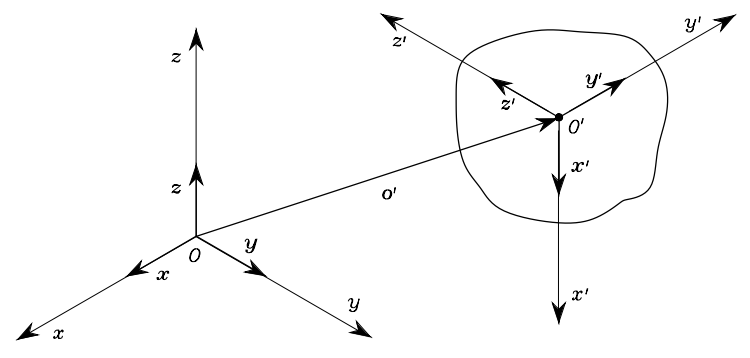

A rigid body in space is fully described by its position and orientation with respect to a reference coordinate frame. Together, these make up what is called the <u>pose</u> of the body.

Let us consider a reference frame $F = O\text{-}xyz$, where $\mathbf{x}, \mathbf{y}, \mathbf{z}$ are unit vectors along the coordinate axes and $O$ is the origin of the frame. Suppose there is a point $O'$ fixed on the rigid body. The position of this point with respect to the frame $F$ can be described as a vector $\mathbf{o}' \in \mathbb{R}^3$.

This position vector can be expressed in terms of the reference frame’s unit vectors as:

$$
\mathbf{o}' = o_x' \mathbf{x} + o_y' \mathbf{y} + o_z' \mathbf{z}
$$

Here, $o_x', o_y', o_z'$ are the components of the vector along each axis of the reference frame. Equivalently, this can be written in a compact column vector form:

$$
\mathbf{o}' =
\begin{bmatrix}
o_x' \\
o_y' \\
o_z'
\end{bmatrix}
$$

This vector $\mathbf{o}'$ is called a bound vector, meaning that not only its magnitude and direction are defined, but also the point of application and the line along which it acts are fixed in space. This is a crucial concept in rigid body mechanics because the physical position of the point (not just its relative location) matters in further computations such as rotations or force applications.

Let's now plot the position vector $o$ in 3D space.








Position vector o:
[1. 2. 3.]


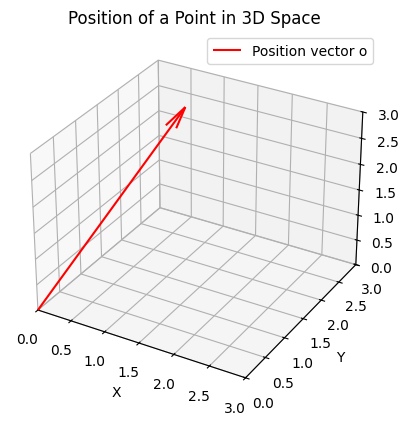

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the position vector o
o = np.array([1.0, 2.0, 3.0])  # [ox, oy, oz]

print("Position vector o:")
print(o)

# Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, o[0], o[1], o[2], color='r', arrow_length_ratio=0.1, label='Position vector o')
ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 3])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title('Position of a Point in 3D Space')
plt.show()

### 1.2 Orientation of a Rigid Body

The orientation of a rigid body is described by attaching a new orthonormal frame $O'\text{-}x'y'z'$ to the body and expressing its axes with respect to the reference frame $O\text{-}xyz$.

Each unit vector $\mathbf{x}', \mathbf{y}', \mathbf{z}'$ of the body frame is expressed in terms of the reference frame as:

$$
\mathbf{x}' = x'_x \mathbf{x} + x'_y \mathbf{y} + x'_z \mathbf{z}
$$
$$
\mathbf{y}' = y'_x \mathbf{x} + y'_y \mathbf{y} + y'_z \mathbf{z}
$$
$$
\mathbf{z}' = z'_x \mathbf{x} + z'_y \mathbf{y} + z'_z \mathbf{z}
$$

These components ( $x'_x, x'_y, x'_z, \ldots$ ) are called the direction cosines.

Rotation matrix R:
[[ 0.707 -0.707  0.   ]
 [ 0.707  0.707  0.   ]
 [ 0.     0.     1.   ]]


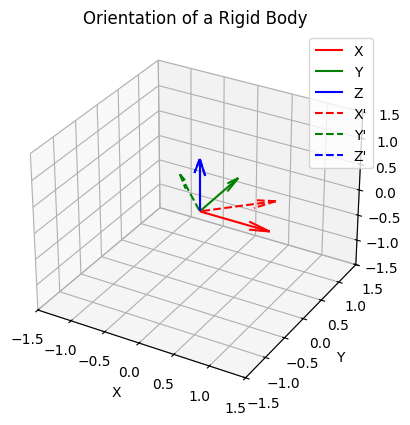

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the rotation matrix R
R = np.array([[0.707, -0.707, 0],
              [0.707, 0.707, 0],
              [0, 0, 1]])

print("Rotation matrix R:")
print(R)

# Visualize the coordinate system
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the reference frame axes
ax.quiver(0, 0, 0, 1, 0, 0, color='r', label='X')
ax.quiver(0, 0, 0, 0, 1, 0, color='g', label='Y')
ax.quiver(0, 0, 0, 0, 0, 1, color='b', label='Z')

# Plot the rotated frame axes
x_prime = np.dot(R, np.array([1, 0, 0]))
y_prime = np.dot(R, np.array([0, 1, 0]))
z_prime = np.dot(R, np.array([0, 0, 1]))

ax.quiver(0, 0, 0, x_prime[0], x_prime[1], x_prime[2], color='r', linestyle='--', label="X'")
ax.quiver(0, 0, 0, y_prime[0], y_prime[1], y_prime[2], color='g', linestyle='--', label="Y'")
ax.quiver(0, 0, 0, z_prime[0], z_prime[1], z_prime[2], color='b', linestyle='--', label="Z'")

ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title('Orientation of a Rigid Body')
plt.show()

---

## 2. Rotation Matrix

In this section, we explore how a rotation matrix compactly represents the orientation of a rigid body in 3D space.

The unit vectors of a rotated frame can be combined into a 3×3 matrix $R$:

$$
R = \begin{bmatrix}
  \mathbf{x}' & \mathbf{y}' & \mathbf{z}'
  \end{bmatrix}
=
\begin{bmatrix}
  x'_x & y'_x & z'_x \\
  x'_y & y'_y & z'_y \\
  x'_z & y'_z & z'_z
\end{bmatrix}
$$

This is called the <u>rotation matrix</u>. Each column corresponds to the direction cosines of the body frame axes with respect to the reference frame.

### 2.1 Properties of the Rotation Matrix

- The columns of $R$ are orthonormal:
  $$
  \mathbf{x'}^T \mathbf{y'} = 0,\quad \mathbf{y'}^T \mathbf{z'} = 0,\quad \mathbf{z'}^T \mathbf{x'} = 0
  $$
  $$
  \|\mathbf{x'}\| = \|\mathbf{y'}\| = \|\mathbf{z'}\| = 1
  $$

- $R$ is orthogonal:
  $$
  R^T R = I_3 \quad \Rightarrow \quad R^T = R^{-1}
  $$
  where $I_3$ denotes the (3 × 3) identity matrix.

- For right-handed systems:
  $$
  \det(R) = 1
  $$

- For left-handed systems:
  $$
  \det(R) = -1
  $$

Now, let's check the properties of the rotation matrix using code.

In [ ]:
import numpy as np

# Define a sample rotation matrix (90° rotation about z-axis)
theta = np.pi / 2  # 90 degrees
Rz = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta),  np.cos(theta), 0],
    [0,              0,             1]
])

# Check orthogonality
Rt = Rz.T
# np.allclose checks if two arrays are element-wise equal within a small tolerance
orthogonality_check = np.allclose(Rt @ Rz, np.eye(3))  # Should be identity matrix
inverse_check = np.allclose(Rt, np.linalg.inv(Rz))     # Should be equal if R is orthogonal

print("Rz:\n", Rz)
print("Is R^T * R = I?", orthogonality_check)
print("Is R^T = R⁻¹?", inverse_check)

Rz:
 [[ 6.123234e-17 -1.000000e+00  0.000000e+00]
 [ 1.000000e+00  6.123234e-17  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00]]
Is R^T * R = I? True
Is R^T = R⁻¹? True


### 2.2 Elementary Rotation Matrices

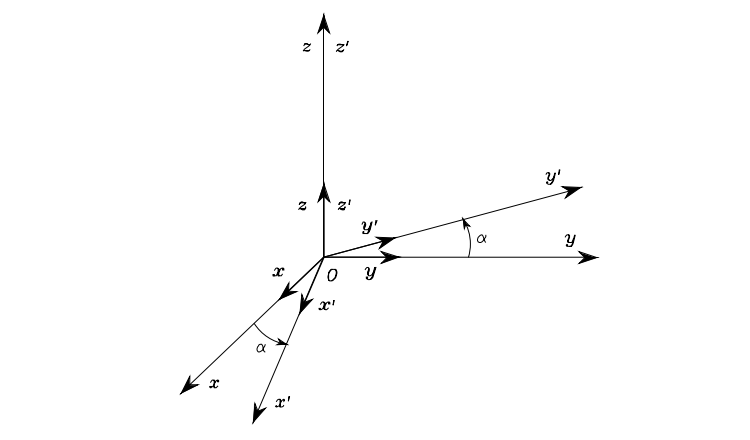

Rotations in 3D space can be described using elementary rotation matrices, each representing a rotation about one of the main coordinate axes of a fixed reference frame $O\text{-}xyz$. A rotation is considered positive if it is counter-clockwise when viewed along the direction of the axis.

A rotation about the x-axis by angle $\gamma$ keeps the x-axis fixed and rotates the y- and z-axes. The corresponding matrix is:

$$
R_x(\gamma) =
\begin{bmatrix}
1 & 0 & 0 \\
0 & \cos\gamma & -\sin\gamma \\
0 & \sin\gamma & \cos\gamma
\end{bmatrix}
$$

A rotation about the y-axis by angle $\beta$ fixes the y-axis, rotating the x- and z-axes:

$$
R_y(\beta) =
\begin{bmatrix}
\cos\beta & 0 & \sin\beta \\
0 & 1 & 0 \\
-\sin\beta & 0 & \cos\beta
\end{bmatrix}
$$

A rotation about the z-axis by angle $\alpha$ fixes the z-axis, rotating the x- and y-axes in the xy-plane:

$$
R_z(\alpha) =
\begin{bmatrix}
\cos\alpha & -\sin\alpha & 0 \\
\sin\alpha & \cos\alpha & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

These matrices form the basis for building more complex rotation representations, such as Euler angles or full transformation matrices in robotics and kinematics.

Let’s now define elementary rotation matrices as Python functions.


In [ ]:
def Rx(gamma):
    return np.array([
        [1, 0, 0],
        [0, np.cos(gamma), -np.sin(gamma)],
        [0, np.sin(gamma),  np.cos(gamma)]
    ])

def Ry(beta):
    return np.array([
        [np.cos(beta), 0, np.sin(beta)],
        [0, 1, 0],
        [-np.sin(beta), 0, np.cos(beta)]
    ])

def Rz(alpha):
    return np.array([
        [np.cos(alpha), -np.sin(alpha), 0],
        [np.sin(alpha),  np.cos(alpha), 0],
        [0, 0, 1]
    ])

# Example rotation: 45 degrees about each axis
alpha = np.deg2rad(45)
beta = np.deg2rad(45)
gamma = np.deg2rad(45)

print("Rx:\n", Rx(gamma))
print("Ry:\n", Ry(beta))
print("Rz:\n", Rz(alpha))

Rx:
 [[ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]
 [ 0.          0.70710678  0.70710678]]
Ry:
 [[ 0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]
 [-0.70710678  0.          0.70710678]]
Rz:
 [[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


### 2.3 Representation of a Vector

Suppose a vector $\mathbf{p}'$ is given in the body frame, and we want to express it in the reference frame. This is achieved through the rotation matrix $R$:

$$
\mathbf{p} = R \mathbf{p}'
$$

This means that $\mathbf{p}'$ is the coordinate of the same point, but expressed in the body frame, and $\mathbf{p}$ is its expression in the reference frame.

The inverse transformation allows us to recover the body-frame representation from the reference-frame one:

$$
\mathbf{p}' = R^T \mathbf{p}
$$

This works because the rotation matrix $R$ is orthogonal, meaning it satisfies:

$$
R^T R = I
$$

Hence, its transpose is equal to its inverse, which ensures that the coordinate transformation can be reversed by transposing $R$.


In [ ]:
# Vector in body frame
p_body = np.array([[1], [0], [0]])

# Rotate using Rz(90°)
rotation = Rz(90)
p_world = rotation @ p_body
p_body_back = rotation.T @ p_world

print("p in world frame:\n", p_world)
print("p back in body frame:\n", p_body_back)

p in world frame:
 [[-0.44807362]
 [ 0.89399666]
 [ 0.        ]]
p back in body frame:
 [[1.]
 [0.]
 [0.]]


### 2.4 Rotation of a Vector

The rotation matrix can also be interpreted as a linear operator that rotates a vector in space about a specific axis by a given angle, while keeping the vector in the same coordinate frame.

Let $\mathbf{p}$ be a vector expressed in the reference frame. When we apply a rotation matrix $R$ to $\mathbf{p}$, the result is a new vector $R\mathbf{p}$, which is the rotated version of $\mathbf{p}$:

$$
\mathbf{p}' = R \mathbf{p}
$$

Importantly, the rotation matrix does not affect the norm (length) of the vector:

$$
\|\mathbf{p}\| = \|R \mathbf{p}\|
$$

This norm-preserving property is a consequence of the orthogonality of $R$. Since $R^T R = I$, we can prove the preservation of the norm as follows:

$$
\|R \mathbf{p}\|^2 = (R \mathbf{p})^T (R \mathbf{p}) = \mathbf{p}^T R^T R \mathbf{p} = \mathbf{p}^T \mathbf{p} = \|\mathbf{p}\|^2
$$

Therefore, the rotation matrix preserves not only the length of vectors, but also the angles between vectors. This is why rotation matrices are isometries — they preserve geometric structure.

---

## 3. Composition of Rotation Matrices

In this section, we will understand how rotation matrices can be composed to represent successive rotations between coordinate frames.

Suppose we have three coordinate frames with the same origin:

- Frame 0: $O\text{-}x_0y_0z_0$
- Frame 1: $O\text{-}x_1y_1z_1$
- Frame 2: $O\text{-}x_2y_2z_2$

Let $\mathbf{p}_2$ be the coordinates of a vector $\mathbf{p}$ in Frame 2. Then, the transformations between frames are given by:

$$
\mathbf{p}_1 = R^1_2 \mathbf{p}_2
$$
$$
\mathbf{p}_0 = R^0_1 \mathbf{p}_1
$$

By substituting, we get:

$$
\mathbf{p}_0 = R^0_1 R^1_2 \mathbf{p}_2 = R^0_2 \mathbf{p}_2
$$

This shows that composing rotations corresponds to multiplying their respective rotation matrices:

$$
R^0_2 = R^0_1 R^1_2
$$

Let us now consider an example of how to compose rotation matrices.

In [ ]:
import numpy as np

def Rz(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0, 0, 1]
    ])

def Ry(theta):
    return np.array([
        [np.cos(theta), 0, np.sin(theta)],
        [0, 1, 0],
        [-np.sin(theta), 0, np.cos(theta)]
    ])

# Rotation from Frame 2 to Frame 1 (R^1_2): rotate 90° about z
R1_2 = Rz(np.pi / 2)

# Rotation from Frame 1 to Frame 0 (R^0_1): rotate 90° about y
R0_1 = Ry(np.pi / 2)

# Compose to get R^0_2
R0_2 = R0_1 @ R1_2

np.set_printoptions(precision=5, suppress=True)
print("R^0_2 = R^0_1 * R^1_2:\n", R0_2)

R^0_2 = R^0_1 * R^1_2:
 [[ 0. -0.  1.]
 [ 1.  0.  0.]
 [-0.  1.  0.]]


When composing multiple rotation matrices, keep in mind the following:

- If each rotation is defined with respect to the current (rotating) frame, apply them using post-multiplication in the order they occur:
  $$
  R_{\text{final}} = R_1 R_2 R_3 \dots
  $$

- If each rotation is defined with respect to a fixed (initial) frame, apply them using pre-multiplication in reverse order:
  $$
  R_{\text{final}} = R_n \dots R_2 R_1
  $$

- Rotation matrices are not commutative:
  $$
  R_1 R_2 \ne R_2 R_1
  $$

  The order in which you apply the rotations matters and directly affects the final orientation.

Let's verify that rotation matrices are not commutative using the following code.

In [ ]:
# Define two simple rotation matrices
Rz_45 = Rz(np.pi / 4)
Ry_45 = Ry(np.pi / 4)

# Compose in two different orders
R1 = Rz_45 @ Ry_45
R2 = Ry_45 @ Rz_45

# Check if they are equal
are_equal = np.allclose(R1, R2)
print("Is Rz(45°) * Ry(45°) equal to Ry(45°) * Rz(45°)?", are_equal)

Is Rz(45°) * Ry(45°) equal to Ry(45°) * Rz(45°)? False


---

## 4. Euler Angles

Rotation matrices contain 9 elements, but only 3 degrees of freedom are needed to describe orientation in 3D space. This redundancy comes from the orthogonality constraints, making a minimal representation possible.

A minimal representation of orientation can be achieved using a set of three angles:

$$
\boldsymbol{\phi} = [\phi, \theta, \psi]
$$

Each of these angles corresponds to an elementary rotation about a specific coordinate axis. A general rotation matrix can be constructed by composing three such rotations in a particular sequence, ensuring that no two successive rotations occur about the same axis.

Out of 27 possible axis combinations, only 12 produce valid and distinct Euler angle representations. Among these, two commonly used sequences are:

- ZYZ angles
- ZYX angles

### 4.1 ZYZ Euler Angles

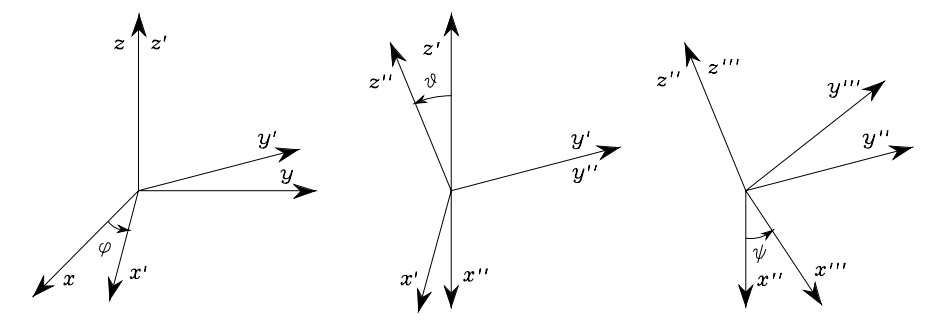

The ZYZ convention represents a rotation as:

1. Rotate about Z-axis by $\phi$; this rotation is described by the matrix $R_z(\phi)$.
2. Rotate about Y-axis (of rotated frame) by $\theta$; this rotation is described by the matrix $R_y(\theta)$.
3. Rotate about Z-axis (again, of current frame) by $\psi$; this rotation is described by the matrix $R_z(\psi)$.

The composed rotation matrix is:

$$
R(\phi, \theta, \psi) = R_z(\phi) \cdot R_y(\theta) \cdot R_z(\psi) \\
=
\begin{bmatrix}
\cos\phi \cos\theta \cos\psi - \sin\phi \sin\psi & -\cos\phi \cos\theta \sin\psi - \sin\phi \cos\psi & \cos\phi \sin\theta \\
\sin\phi \cos\theta \cos\psi + \cos\phi \sin\psi & -\sin\phi \cos\theta \sin\psi + \cos\phi \cos\psi & \sin\phi \sin\theta \\
-\sin\theta \cos\psi & \sin\theta \sin\psi & \cos\theta
\end{bmatrix}
$$

In [ ]:
import numpy as np

def Rz(angle):
    return np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle),  np.cos(angle), 0],
        [0, 0, 1]
    ])

def Ry(angle):
    return np.array([
        [np.cos(angle), 0, np.sin(angle)],
        [0, 1, 0],
        [-np.sin(angle), 0, np.cos(angle)]
    ])

# Euler angles in radians
phi = np.deg2rad(45)
theta = np.deg2rad(30)
psi = np.deg2rad(60)

# Compute ZYZ rotation matrix
R_zyz = Rz(phi) @ Ry(theta) @ Rz(psi)
print("ZYZ Rotation Matrix:\n", R_zyz)

ZYZ Rotation Matrix:
 [[-0.30619 -0.88388  0.35355]
 [ 0.91856 -0.17678  0.35355]
 [-0.25     0.43301  0.86603]]


When a rotation matrix $R$ is given, it is possible to determine the corresponding set of ZYZ Euler angles that would produce the same orientation. This process is known as solving the inverse problem of Euler angle decomposition.

Given a rotation matrix:

$$
R =
\begin{bmatrix}
r_{11} & r_{12} & r_{13} \\
r_{21} & r_{22} & r_{23} \\
r_{31} & r_{32} & r_{33}
\end{bmatrix}
$$

The ZYZ Euler angles $\phi, \theta, \psi$ can be extracted using the following formulas:

$$
\phi = \text{atan2}(r_{23}, r_{13})
$$

$$
\theta = \text{atan2}(\sqrt{r_{13}^2 + r_{23}^2}, r_{33})
$$

$$
\psi = \text{atan2}(r_{32}, -r_{31})
$$

These angles describe the sequence of rotations around the Z, Y, and Z axes that reconstruct the given orientation encoded in $R$.

Let's verify this inverse problem using the following code.

In [ ]:
def inverse_ZYZ(R):
    phi = np.arctan2(R[1, 2], R[0, 2])
    theta = np.arctan2(np.sqrt(R[0, 2]**2 + R[1, 2]**2), R[2, 2])
    psi = np.arctan2(R[2, 1], -R[2, 0])
    return phi, theta, psi

phi_i, theta_i, psi_i = inverse_ZYZ(R_zyz)
print("Inverse ZYZ Euler angles (rad):", phi_i, theta_i, psi_i)
print("In degrees:", np.rad2deg([phi_i, theta_i, psi_i]))

Inverse ZYZ Euler angles (rad): 0.7853981633974483 0.5235987755982987 1.0471975511965976
In degrees: [45. 30. 60.]


### 4.2 Roll–Pitch–Yaw (ZYX) Angles

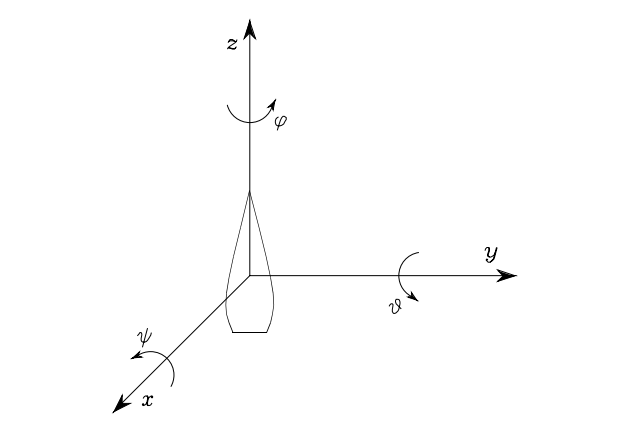

The ZYX convention, also known as Roll–Pitch–Yaw, defines orientation using three sequential rotations about fixed axes. The angles $\phi, \theta, \psi$ represent:

1. A rotation about the x-axis by $\psi$ (Yaw); this rotation is described by the matrix $R_x(\psi)$.
2. Followed by a rotation about the y-axis by $\theta$ (Pitch); this rotation is described by the matrix $R_y(\theta)$.
3. And finally, a rotation about the z-axis by $\phi$ (Roll); this rotation is described by the matrix $R_z(\phi)$.

These rotations are applied with respect to a fixed reference frame, and the overall orientation is obtained through pre-multiplication of the individual rotation matrices:

$$
R(\phi, \theta, \psi) = R_z(\phi) \cdot R_y(\theta) \cdot R_x(\psi)
$$

This sequence allows us to describe a rigid body's orientation using three intuitive angular parameters.

In [ ]:
import numpy as np

# Rotation matrix about the x-axis by a given angle (in radians)
def Rx(angle):
    return np.array([
        [1, 0, 0],
        [0, np.cos(angle), -np.sin(angle)],
        [0, np.sin(angle),  np.cos(angle)]
    ])

# Rotation matrix about the y-axis by a given angle (in radians)
def Ry(angle):
    return np.array([
        [np.cos(angle), 0, np.sin(angle)],
        [0, 1, 0],
        [-np.sin(angle), 0, np.cos(angle)]
    ])

# Rotation matrix about the z-axis by a given angle (in radians)
def Rz(angle):
    return np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle),  np.cos(angle), 0],
        [0, 0, 1]
    ])

# Define the three angles for roll (phi), pitch (theta), and yaw (psi)
phi = np.deg2rad(30)    # Roll angle (rotation about z-axis)
theta = np.deg2rad(45)  # Pitch angle (rotation about y-axis)
psi = np.deg2rad(60)    # Yaw angle (rotation about x-axis)

# Compose the full RPY (ZYX) rotation matrix using fixed-frame (pre-multiplication) convention
R_rpy = Rz(phi) @ Ry(theta) @ Rx(psi)

# Display the result
print("RPY (ZYX) Rotation Matrix:\n", R_rpy)

RPY (ZYX) Rotation Matrix:
 [[ 0.61237  0.28033  0.7392 ]
 [ 0.35355  0.7392  -0.57322]
 [-0.70711  0.61237  0.35355]]


To compute the inverse of a rotation matrix in terms of Roll–Pitch–Yaw (RPY) Euler angles, we compare the given matrix with the standard composition of rotations in the ZYX order:

Given a rotation matrix:

$$
R =
\begin{bmatrix}
r_{11} & r_{12} & r_{13} \\
r_{21} & r_{22} & r_{23} \\
r_{31} & r_{32} & r_{33}
\end{bmatrix}
$$

The corresponding RPY Euler angles $\phi$ (roll), $\theta$ (pitch), and $\psi$ (yaw) can be recovered using the following equations:

$$
\phi = \text{atan2}(r_{21}, r_{11})
$$

$$
\theta = \text{atan2}(-r_{31}, \sqrt{r_{32}^2 + r_{33}^2})
$$

$$
\psi = \text{atan2}(r_{32}, r_{33})
$$

This solution assumes $\theta \in (-\pi/2, \pi/2)$. An alternative solution exists for $\theta \in (\pi/2, 3\pi/2)$, but both represent the same orientation due to periodicity.


Let's also compute the inverse problem using the following code.

In [ ]:
def inverse_RPY(R):
    phi = np.arctan2(R[1, 0], R[0, 0])
    theta = np.arctan2(-R[2, 0], np.sqrt(R[2, 1]**2 + R[2, 2]**2))
    psi = np.arctan2(R[2, 1], R[2, 2])
    return phi, theta, psi

phi_r, theta_r, psi_r = inverse_RPY(R_rpy)
print("Inverse RPY Euler angles (rad):", phi_r, theta_r, psi_r)
print("In degrees:", np.rad2deg([phi_r, theta_r, psi_r]))

Inverse RPY Euler angles (rad): 0.5235987755982988 0.7853981633974483 1.0471975511965976
In degrees: [30. 45. 60.]


Both Euler angle conventions suffer from singularities (also called <u>gimbal lock</u>), where two rotation axes align and information is lost.

- For ZYZ: singularity when $\theta = 0$ or $\pi$
- For ZYX: singularity when $\theta = \pm \frac{\pi}{2}$


---

## 5. Angle and Axis

Orientation in 3D space can also be described using an axis–angle pair. In this representation, a rotation is defined by a unit vector $\mathbf{r} = [r_x, r_y, r_z]^T$, indicating the axis of rotation, and an angle $\vartheta$ (in radians), which specifies how much to rotate around that axis.

The rotation is considered positive if it follows the right-hand rule — that is, counter-clockwise when viewed along the direction of $\mathbf{r}$. This representation is particularly useful in motion planning and interpolation tasks, as it captures the geometric meaning of rotation very intuitively.

The corresponding rotation matrix $R(\vartheta, \mathbf{r})$ is obtained using <u>Rodrigues' rotation formula</u>:

$$
R(\vartheta, \mathbf{r}) =
\begin{bmatrix}
r_x^2(1 - \cos \vartheta) + \cos \vartheta & r_x r_y (1 - \cos \vartheta) - r_z \sin \vartheta & r_x r_z (1 - \cos \vartheta) + r_y \sin \vartheta \\
r_x r_y (1 - \cos \vartheta) + r_z \sin \vartheta & r_y^2 (1 - \cos \vartheta) + \cos \vartheta & r_y r_z (1 - \cos \vartheta) - r_x \sin \vartheta \\
r_x r_z (1 - \cos \vartheta) - r_y \sin \vartheta & r_y r_z (1 - \cos \vartheta) + r_x \sin \vartheta & r_z^2 (1 - \cos \vartheta) + \cos \vartheta
\end{bmatrix}
$$

This representation uses four values — the three components of $\mathbf{r}$ and the angle $\vartheta$ — but because the axis must be a unit vector, only three of them are independent. One notable property of this representation is that a rotation by $-\vartheta$ around axis $-\mathbf{r}$ produces the same rotation matrix, meaning the representation is not unique.

If a rotation matrix $R$ is given, the corresponding axis and angle can be recovered as follows. First, compute the angle using:

$$
\vartheta = \cos^{-1}\left(\frac{r_{11} + r_{22} + r_{33} - 1}{2}\right)
$$

Then, assuming $\sin \vartheta \ne 0$, the axis of rotation is:

$$
\mathbf{r} = \frac{1}{2 \sin \vartheta}
\begin{bmatrix}
r_{32} - r_{23} \\
r_{13} - r_{31} \\
r_{21} - r_{12}
\end{bmatrix}
$$

However, when $\vartheta = 0$ or $\pi$, special care is needed. In those cases, the rotation axis becomes undefined or ambiguous due to the singularity in the equation.

Let’s now verify the axis–angle rotation representation and its inverse using the following program.


In [ ]:
import numpy as np

def axis_angle_to_matrix(axis, theta):
    axis = axis / np.linalg.norm(axis)
    rx, ry, rz = axis
    c = np.cos(theta)
    s = np.sin(theta)
    C = 1 - c

    R = np.array([
        [rx*rx*C + c,     rx*ry*C - rz*s, rx*rz*C + ry*s],
        [ry*rx*C + rz*s,  ry*ry*C + c,    ry*rz*C - rx*s],
        [rz*rx*C - ry*s,  rz*ry*C + rx*s, rz*rz*C + c]
    ])
    return R

# Example: 90 degrees around axis [1, 1, 0]
axis = np.array([1, 1, 0])
theta = np.pi / 2

R = axis_angle_to_matrix(axis, theta)
print("Rotation matrix R from axis-angle:\n", R)

Rotation matrix R from axis-angle:
 [[ 0.5      0.5      0.70711]
 [ 0.5      0.5     -0.70711]
 [-0.70711  0.70711  0.     ]]


In [ ]:
def matrix_to_axis_angle(R):
    theta = np.arccos((np.trace(R) - 1) / 2)
    if np.isclose(theta, 0):
        return np.array([1, 0, 0]), 0  # arbitrary axis
    elif np.isclose(theta, np.pi):
        # Special case; not handled here
        raise ValueError("Angle is pi; special handling required.")
    else:
        rx = (R[2, 1] - R[1, 2]) / (2 * np.sin(theta))
        ry = (R[0, 2] - R[2, 0]) / (2 * np.sin(theta))
        rz = (R[1, 0] - R[0, 1]) / (2 * np.sin(theta))
        axis = np.array([rx, ry, rz])
        return axis / np.linalg.norm(axis), theta

axis_out, theta_out = matrix_to_axis_angle(R)
print("Extracted axis:", axis_out)
print("Extracted angle (deg):", np.rad2deg(theta_out))

Extracted axis: [0.70711 0.70711 0.     ]
Extracted angle (deg): 90.00000000000001


This approach describes rotation using four parameters: angle and a 3D unit vector, which is constrained by:

$$
r_x^2 + r_y^2 + r_z^2 = 1
$$

Note: the representation is not unique since:

$$
R(-\vartheta, -\mathbf{r}) = R(\vartheta, \mathbf{r})
$$

---

## 6. Unit Quaternion

A unit quaternion provides a four-parameter representation of orientation that avoids some of the drawbacks of the angle–axis representation.

A unit quaternion is defined as:

$$
Q = \{\eta, \boldsymbol{\epsilon}\}
$$

Where:

$$
\eta = \cos\left(\frac{\vartheta}{2}\right), \quad \boldsymbol{\epsilon} = \sin\left(\frac{\vartheta}{2}\right) \mathbf{r}
$$

Here:
- $\eta$: scalar part
- $\boldsymbol{\epsilon} = [\epsilon_x, \epsilon_y, \epsilon_z]^T$: vector part
- $\mathbf{r}$: unit axis of rotation
- $\vartheta$: angle of rotation

These satisfy the constraint:

$$
\eta^2 + \epsilon_x^2 + \epsilon_y^2 + \epsilon_z^2 = 1
$$

Unlike the axis-angle representation, a rotation by $-\vartheta$ about $-\mathbf{r}$ gives the same quaternion as $\vartheta$ about $\mathbf{r}$, solving the non-uniqueness issue.

In [ ]:
def axis_angle_to_quaternion(axis, theta):
    axis = axis / np.linalg.norm(axis)
    eta = np.cos(theta / 2)
    epsilon = axis * np.sin(theta / 2)
    return eta, epsilon

# Example: 90 degrees around axis [1, 0, 0]
axis = np.array([1, 0, 0])
theta = np.pi / 2
eta, epsilon = axis_angle_to_quaternion(axis, theta)

print("Quaternion (eta, epsilon):")
print("eta:", eta)
print("epsilon:", epsilon)

Quaternion (eta, epsilon):
eta: 0.7071067811865476
epsilon: [0.70711 0.      0.     ]


### 6.1 Rotation Matrix from Quaternion

Given $Q = \{\eta, \boldsymbol{\epsilon}\}$, the rotation matrix is:

$$
R = \begin{bmatrix}
2(\eta^2 + \epsilon_x^2) - 1 & 2(\epsilon_x \epsilon_y - \eta \epsilon_z) & 2(\epsilon_x \epsilon_z + \eta \epsilon_y) \\
2(\epsilon_x \epsilon_y + \eta \epsilon_z) & 2(\eta^2 + \epsilon_y^2) - 1 & 2(\epsilon_y \epsilon_z - \eta \epsilon_x) \\
2(\epsilon_x \epsilon_z - \eta \epsilon_y) & 2(\epsilon_y \epsilon_z + \eta \epsilon_x) & 2(\eta^2 + \epsilon_z^2) - 1
\end{bmatrix}
$$

In [ ]:
def quaternion_to_matrix(eta, epsilon):
    ex, ey, ez = epsilon
    R = np.array([
        [2*(eta**2 + ex**2) - 1, 2*(ex*ey - eta*ez),     2*(ex*ez + eta*ey)],
        [2*(ex*ey + eta*ez),     2*(eta**2 + ey**2) - 1, 2*(ey*ez - eta*ex)],
        [2*(ex*ez - eta*ey),     2*(ey*ez + eta*ex),     2*(eta**2 + ez**2) - 1]
    ])
    return R

R = quaternion_to_matrix(eta, epsilon)
print("Rotation matrix from quaternion:\n", R)

Rotation matrix from quaternion:
 [[ 1.  0.  0.]
 [ 0.  0. -1.]
 [ 0.  1.  0.]]


Just like with Euler angles, it is also possible to compute the inverse transformation from a given rotation matrix to its equivalent quaternion representation.

Given a rotation matrix:

$$
R =
\begin{bmatrix}
r_{11} & r_{12} & r_{13} \\
r_{21} & r_{22} & r_{23} \\
r_{31} & r_{32} & r_{33}
\end{bmatrix}
$$

The corresponding unit quaternion $Q = \{ \eta, \boldsymbol{\epsilon} \}$ can be extracted as follows:

The scalar part is:

$$
\eta = \frac{1}{2} \sqrt{r_{11} + r_{22} + r_{33} + 1}
$$

The vector part is:

$$
\boldsymbol{\epsilon} = \frac{1}{2}
\begin{bmatrix}
\text{sgn}(r_{32} - r_{23}) \sqrt{r_{11} - r_{22} - r_{33} + 1} \\
\text{sgn}(r_{13} - r_{31}) \sqrt{r_{22} - r_{33} - r_{11} + 1} \\
\text{sgn}(r_{21} - r_{12}) \sqrt{r_{33} - r_{11} - r_{22} + 1}
\end{bmatrix}
$$

Here, $\text{sgn}(x)$ denotes the sign function, defined as:

- $\text{sgn}(x) = 1$ for $x \geq 0$
- $\text{sgn}(x) = -1$ for $x < 0$

This convention ensures a consistent direction for the vector part of the quaternion. Also, it is typically assumed that $\eta \geq 0$, which corresponds to describing the rotation within the range $\theta \in [-\pi, \pi]$. Unlike axis–angle representations, this quaternion-based method avoids singularities and provides a smooth parameterization of rotation.

Now, let's compute the quaternion from a rotation matrix.

In [ ]:
def sgn(x):
    return 1 if x >= 0 else -1

def matrix_to_quaternion(R):
    eta = 0.5 * np.sqrt(np.trace(R) + 1)
    ex = 0.5 * sgn(R[2, 1] - R[1, 2]) * np.sqrt(R[0, 0] - R[1, 1] - R[2, 2] + 1)
    ey = 0.5 * sgn(R[0, 2] - R[2, 0]) * np.sqrt(R[1, 1] - R[2, 2] - R[0, 0] + 1)
    ez = 0.5 * sgn(R[1, 0] - R[0, 1]) * np.sqrt(R[2, 2] - R[0, 0] - R[1, 1] + 1)
    return eta, np.array([ex, ey, ez])

eta2, epsilon2 = matrix_to_quaternion(R)
print("Recovered quaternion (eta, epsilon):", eta2, epsilon2)

Recovered quaternion (eta, epsilon): 0.7071067811865476 [0.70711 0.      0.     ]


For a unit quaternion $Q = \{\eta, \boldsymbol{\epsilon}\}$, the inverse is simply:

$$
Q^{-1} = \{\eta, -\boldsymbol{\epsilon}\}
$$

This follows from the fact that the quaternion has unit norm.

Quaternion multiplication combines both scalar and vector parts. Given $Q_1 = \{\eta_1, \boldsymbol{\epsilon}_1\}$ and $Q_2 = \{\eta_2, \boldsymbol{\epsilon}_2\}$, their product is:

$$
Q_1 * Q_2 = \{\eta_1 \eta_2 - \boldsymbol{\epsilon}_1^T \boldsymbol{\epsilon}_2,\ \eta_1 \boldsymbol{\epsilon}_2 + \eta_2 \boldsymbol{\epsilon}_1 + \boldsymbol{\epsilon}_1 \times \boldsymbol{\epsilon}_2\}
$$

This formula is used to compose two rotations represented by quaternions.

In [ ]:
def quaternion_product(q1, q2):
    eta1, e1 = q1
    eta2, e2 = q2
    eta = eta1 * eta2 - np.dot(e1, e2)
    epsilon = eta1 * e2 + eta2 * e1 + np.cross(e1, e2)
    return eta, epsilon

# Example usage
Q1 = (eta, epsilon)
Q2 = (eta2, epsilon2)
Q12 = quaternion_product(Q1, Q2)

print("Quaternion product Q1 * Q2:", Q12)

Quaternion product Q1 * Q2: (np.float64(2.220446049250313e-16), array([1., 0., 0.]))


---

## 7. Homogeneous Transformations

To fully describe the pose of a rigid body—both its position and orientation—with respect to a reference frame, we need to account for both translation and rotation. A compact way to represent this combined transformation is using a <u>homogeneous transformation matrix</u>, which integrates both in a single 4×4 matrix.

Let us consider a point $P$ in space. Its coordinates with respect to two different frames—Frame 0 and Frame 1—are given by:

- $\mathbf{p}^0$: coordinates of $P$ in Frame 0  
- $\mathbf{p}^1$: coordinates of $P$ in Frame 1  
- $\mathbf{o}^0_1$: the origin of Frame 1 expressed in Frame 0  
- $R^0_1$: rotation matrix from Frame 1 to Frame 0

Using basic geometry, the position of point $P$ in Frame 0 can be expressed as:

$$
\mathbf{p}^0 = \mathbf{o}^0_1 + R^0_1 \mathbf{p}^1
$$

This transformation includes both translation and rotation. To represent this in a more compact and unified way, we use the homogeneous representation of a point:

$$
\tilde{\mathbf{p}} =
\begin{bmatrix}
\mathbf{p} \\
1
\end{bmatrix}
$$

With this, the transformation becomes:

$$
\tilde{\mathbf{p}}^0 = A^0_1 \tilde{\mathbf{p}}^1
$$

Where the homogeneous transformation matrix $A^0_1$ is defined as:

$$
A^0_1 =
\begin{bmatrix}
R^0_1 & \mathbf{o}^0_1 \\
\mathbf{0}^T & 1
\end{bmatrix}
$$

This matrix maps coordinates from Frame 1 to Frame 0 in a single matrix multiplication, and is widely used in robotics and kinematics to describe poses in 3D space.

Now, let's check the homogeneous transformation using the following code.

In [ ]:
import numpy as np

def homogeneous_transform(R, o):
    A = np.eye(4)
    A[0:3, 0:3] = R
    A[0:3, 3] = o
    return A

# Example: 90° rotation about z and translation [1, 2, 3]
theta = np.pi / 2
R = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta),  np.cos(theta), 0],
    [0, 0, 1]
])
o = np.array([1, 2, 3])

A = homogeneous_transform(R, o)
print("Homogeneous transformation matrix A:\n", A)

Homogeneous transformation matrix A:
 [[ 0. -1.  0.  1.]
 [ 1.  0.  0.  2.]
 [ 0.  0.  1.  3.]
 [ 0.  0.  0.  1.]]


To transform a point from Frame 0 to Frame 1, we need the inverse of the homogeneous transformation matrix $A^0_1$. This inverse transformation allows us to express the coordinates of a point in Frame 1 based on its coordinates in Frame 0.

The inverse matrix $A^1_0$ satisfies:

$$
\tilde{\mathbf{p}}^1 = A^1_0 \tilde{\mathbf{p}}^0 = {A^0_1}^{-1} \tilde{\mathbf{p}}^0
$$

This inverse transformation can be expressed in block matrix form as:

$$
A^1_0 =
\begin{bmatrix}
{R^0_1}^T & -{R^0_1}^T \mathbf{o}^0_1 \\
\mathbf{0}^T & 1
\end{bmatrix}
$$

This form clearly shows that to reverse the transformation, we transpose the rotation matrix (since it is orthogonal) and apply the negative rotated translation vector.

Let's also check this using the following code.

In [ ]:
def invert_homogeneous(A):
    R = A[0:3, 0:3]
    o = A[0:3, 3]
    A_inv = np.eye(4)
    A_inv[0:3, 0:3] = R.T
    A_inv[0:3, 3] = -R.T @ o
    return A_inv

A_inv = invert_homogeneous(A)
print("Inverse transformation matrix A⁻¹:\n", A_inv)

Inverse transformation matrix A⁻¹:
 [[ 0.  1.  0. -2.]
 [-1.  0.  0.  1.]
 [ 0.  0.  1. -3.]
 [ 0.  0.  0.  1.]]


Given a point $\mathbf{p}^1$ in Frame 1, we can compute its coordinates in Frame 0 using:

$$
\tilde{\mathbf{p}}^0 = A^0_1 \tilde{\mathbf{p}}^1
$$

In [ ]:
def transform_point(A, p):
    p_h = np.append(p, 1)  # homogeneous coordinates
    p_transformed = A @ p_h
    return p_transformed[:3]

# Point in Frame 1
p1 = np.array([1, 0, 0])
p0 = transform_point(A, p1)

print("Point in Frame 0:", p0)

Point in Frame 0: [1. 3. 3.]


A sequence of homogeneous transformations can be combined by multiplying their matrices. This allows us to compute a point’s position in the base frame from its coordinates in a later frame.

If the point is expressed in Frame $n$, the full transformation to Frame 0 is:

$$
\tilde{\mathbf{p}}^0 = A^0_1 A^1_2 \dots A^{n-1}_n \tilde{\mathbf{p}}^n
$$

Each matrix $A^{i-1}_i$ transforms coordinates from Frame $i$ to Frame $i-1$.

In [ ]:
# Second transformation: rotate 45° around x and translate [0, 0, 1]
theta2 = np.pi / 4
R2 = np.array([
    [1, 0, 0],
    [0, np.cos(theta2), -np.sin(theta2)],
    [0, np.sin(theta2),  np.cos(theta2)]
])
o2 = np.array([0, 0, 1])

A2 = homogeneous_transform(R2, o2)

# Compose A and A2
A_total = A @ A2
print("Composed transformation A_total:\n", A_total)

# Transform point using composed transformation
p2 = np.array([0, 1, 0])
p0_from_2 = transform_point(A_total, p2)
print("Point in Frame 0 from Frame 2:", p0_from_2)

Composed transformation A_total:
 [[ 0.     -0.7071  0.7071  1.    ]
 [ 1.      0.     -0.      2.    ]
 [ 0.      0.7071  0.7071  4.    ]
 [ 0.      0.      0.      1.    ]]
Point in Frame 0 from Frame 2: [0.2929 2.     4.7071]


This framework allows for consistent and compact transformation of coordinates between multiple reference frames.

---

## 8. Direct Kinematics
*Supplementary Chapter

A manipulator is composed of a sequence of links connected by joints (revolute or prismatic), forming a kinematic chain. The goal of <u>direct kinematics</u> is to compute the pose (position and orientation) of the end-effector as a function of the joint variables.
*(This will be introduced as Forward Kinematics in the next lecture.)*

The pose is described by a homogeneous transformation matrix from the base frame to the end-effector frame.

$$
T^b_e(q) =
\begin{bmatrix}
\mathbf{n}_e(q) & \mathbf{s}_e(q) & \mathbf{a}_e(q) & \mathbf{p}_e(q) \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

Where:
- $q$: vector of joint variables
- $\mathbf{n}_e, \mathbf{s}_e, \mathbf{a}_e$: orthonormal basis of the end-effector frame
- $\mathbf{p}_e$: position of the end-effector

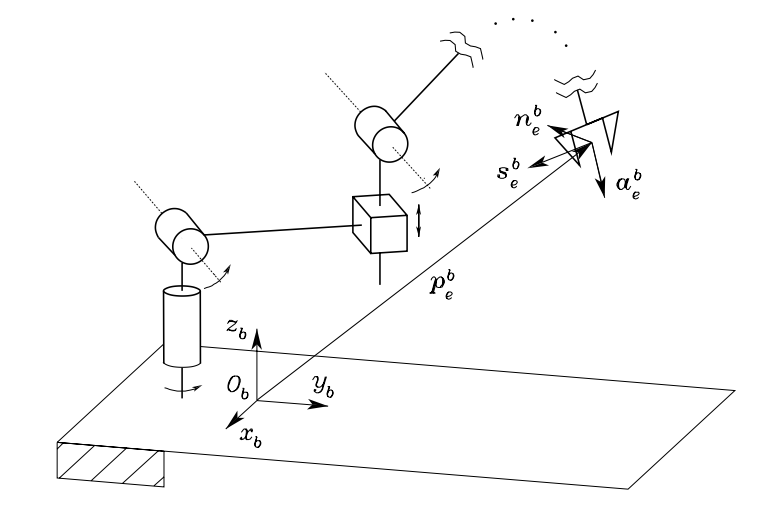

### 8.1 Compose Kinematics for Open Chains

An open-chain manipulator consists of $n + 1$ links connected by $n$ joints, where Link 0 is typically fixed to the ground. Each joint introduces one degree of freedom (DOF), associated with a joint variable $q_i$.

To describe the kinematics of such a structure, we assign a coordinate frame to each link, from Link 0 to Link $n$. The relative motion between each pair of consecutive links is captured by a homogeneous transformation matrix $A^{i-1}_i(q_i)$, which depends on the joint type and the joint variable.

The overall pose of the last link (Link $n$ with respect to the base (Link 0) is obtained by composing these transformations recursively:

$$
T^0_n(q) = A^0_1(q_1) A^1_2(q_2) \dots A^{n-1}_n(q_n)
$$

If the base frame differs from the frame attached to Link 0, or the end-effector frame is offset from Link $n$, we introduce two constant transformations $T^b_0$ and $T^n_e$. The full transformation from the base to the end-effector becomes:

$$
T^b_e(q) = T^b_0 \cdot T^0_n(q) \cdot T^n_e
$$

This structure enables modular and systematic computation of the end-effector pose based on joint configurations, forming the foundation of forward kinematics for open-chain robots.

### 8.2 Denavit–Hartenberg Convention

To compute the direct kinematics of an open-chain manipulator systematically, the Denavit–Hartenberg (DH) convention is used to define relative transformations between consecutive links.

The homogeneous transformation from Frame $i$ to Frame $i - 1$ is defined using the following four parameters:

- $a_i$: link length (distance along $x_i$)
- $d_i$: link offset (distance along $z_{i-1}$)
- $\alpha_i$: twist angle (rotation about $x_i$)
- $\theta_i$: joint angle (rotation about $z_{i-1}$)

For a revolute joint, $\theta_i$ is variable, and $d_i$ is constant.

For a prismatic joint, $d_i$ is variable, and $\theta_i$ is constant.

The transformation from Frame $i - 1$ to Frame $i$ is:

$$
A_{i-1}^{i}(q_i) =
\begin{bmatrix}
\cos\theta_i & -\sin\theta_i\cos\alpha_i & \sin\theta_i\sin\alpha_i & a_i\cos\theta_i \\
\sin\theta_i & \cos\theta_i\cos\alpha_i & -\cos\theta_i\sin\alpha_i & a_i\sin\theta_i \\
0 & \sin\alpha_i & \cos\alpha_i & d_i \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

This matrix is a function of the joint variable $q_i$, depending on the joint type.

In [ ]:
import numpy as np

# Function to compute a single DH transformation matrix
def dh_transform(a, alpha, d, theta):
    sa, ca = np.sin(alpha), np.cos(alpha)
    st, ct = np.sin(theta), np.cos(theta)
    return np.array([
        [ct, -st * ca,  st * sa, a * ct],
        [st,  ct * ca, -ct * sa, a * st],
        [0,   sa,       ca,      d],
        [0,   0,        0,       1]
    ])

### 8.3 Step-by-Step Computation of Direct Kinematics

1. Identify and number the joint axes, defining directions $z_0, \dots, z_{n-1}$.
2. Choose Frame 0 (often coinciding with the base frame).
3. For each $i = 1, \dots, n$:
   - Define the origin $O_i$, axes $( x_i, y_i, z_i)$ based on the DH rules.
4. Choose Frame $n$ (end-effector frame).
5. Construct the DH parameter table $a_i, \alpha_i, d_i, \theta_i$.
6. Compute each transformation matrix $A_{i-1}^i(q_i)$.
7. Multiply sequentially:

$$
T_0^n(q) = A_0^1 A_1^2 \cdots A_{n-1}^n
$$

8. If needed, compute the full direct kinematics:

$$
T_b^e(q) = T_b^0 T_0^n(q) T_n^e
$$

Let's take a look at an example using a 2-link manipulator.

In [ ]:
def compute_direct_kinematics(dh_params, q):
    T = np.eye(4)
    for i in range(len(q)):
        a, alpha, d, theta_offset = dh_params[i]
        if isinstance(q[i], str) and q[i] == 'prismatic':
            theta = theta_offset
            d_var = theta_offset + d
        else:
            theta = q[i] + theta_offset
            d_var = d
        T_i = dh_transform(a, alpha, d_var, theta)
        T = T @ T_i
    return T

# Joint variables
q1 = np.deg2rad(45)
q2 = np.deg2rad(30)

# DH parameters: [a, alpha, d, theta_offset]
dh_params = [
    [1, 0, 0, 0],   # Joint 1
    [1, 0, 0, 0]    # Joint 2
]

T = compute_direct_kinematics(dh_params, [q1, q2])
print("T^0_2:\n", T)

T^0_2:
 [[ 0.25882 -0.96593  0.       0.96593]
 [ 0.96593  0.25882  0.       1.67303]
 [ 0.       0.       1.       0.     ]
 [ 0.       0.       0.       1.     ]]


This completes the DH-based direct kinematics computation. The procedure can be applied to manipulators with any number of joints.


---

## 9. Kinematics of Typical Manipulator Structures


### 9.1 Three-link Planar Arm

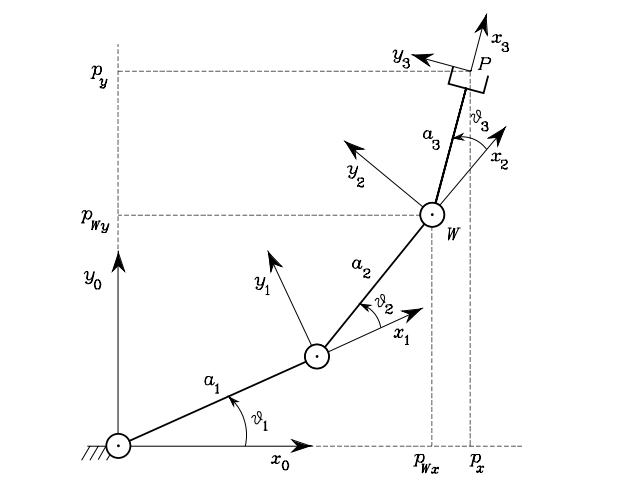

In this example, we compute the direct kinematics of a three-link planar manipulator, a common structure in both educational and industrial robotic arms. All joints are revolute, and the motion is confined to the horizontal plane.

We assume the following structure and simplifications:  
All joint axes are parallel and oriented along the z-axis. Each link frame lies in the same plane, typically the x-y plane. The twist angles $\alpha_i = 0$, and all offsets $d_i = 0$. As a result, the position of the end-effector is entirely determined within the plane.

The Denavit–Hartenberg (DH) parameters for this manipulator are as follows:

| Link | $a_i$ | $\alpha_i$ | $d_i$ | $\theta_i$ |
|------|-----------|----------------|-----------|----------------|
| 1    | $a_1$ | 0              | 0         | $\theta_1$ |
| 2    | $a_2$ | 0              | 0         | $\theta_2$ |
| 3    | $a_3$ | 0              | 0         | $\theta_3$ |

Under these assumptions, the transformation matrix for each joint simplifies to:

$$
A_{i-1}^{i}(\theta_i) =
\begin{bmatrix}
\cos\theta_i & -\sin\theta_i & 0 & a_i \cos\theta_i \\
\sin\theta_i & \cos\theta_i  & 0 & a_i \sin\theta_i \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

The full transformation from the base to the end of the third link is computed as:

$$
T_0^3(\theta) = A_0^1(\theta_1) A_1^2(\theta_2) A_2^3(\theta_3)
$$

Using shorthand notation:
- $\theta_{ij...} = \theta_i + \theta_j + \dots$
- $c_{ij...} = \cos(\theta_{ij...})$, $s_{ij...} = \sin(\theta_{ij...})$

The resulting transformation becomes:

$$
T_0^3 =
\begin{bmatrix}
\cos\theta_{123} & -\sin\theta_{123} & 0 & a_1\cos\theta_1 + a_2\cos\theta_{12} + a_3\cos\theta_{123} \\
\sin\theta_{123} & \cos\theta_{123}  & 0 & a_1\sin\theta_1 + a_2\sin\theta_{12} + a_3\sin\theta_{123} \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

This expression provides a closed-form solution for the end-effector pose in terms of the joint angles and link lengths, within the 2D plane.

Now, let's check the direct kinematics of the three-link planar arm using the following code.

In [ ]:
import numpy as np

def planar_arm_direct_kinematics(a1, a2, a3, theta1, theta2, theta3):
    theta12 = theta1 + theta2
    theta123 = theta12 + theta3

    x = a1 * np.cos(theta1) + a2 * np.cos(theta12) + a3 * np.cos(theta123)
    y = a1 * np.sin(theta1) + a2 * np.sin(theta12) + a3 * np.sin(theta123)

    T = np.eye(4)
    T[0, 0] = np.cos(theta123)
    T[0, 1] = -np.sin(theta123)
    T[0, 3] = x
    T[1, 0] = np.sin(theta123)
    T[1, 1] = np.cos(theta123)
    T[1, 3] = y
    return T

# Link lengths
a1, a2, a3 = 1.0, 1.0, 0.5

# Joint angles in radians
theta1 = np.deg2rad(30)
theta2 = np.deg2rad(45)
theta3 = np.deg2rad(-15)

# Compute direct kinematics
T03 = planar_arm_direct_kinematics(a1, a2, a3, theta1, theta2, theta3)
print("T_0^3 =\n", T03)

T_0^3 =
 [[ 0.5     -0.86603  0.       1.37484]
 [ 0.86603  0.5      0.       1.89894]
 [ 0.       0.       1.       0.     ]
 [ 0.       0.       0.       1.     ]]


### 9.2 Spherical Arm

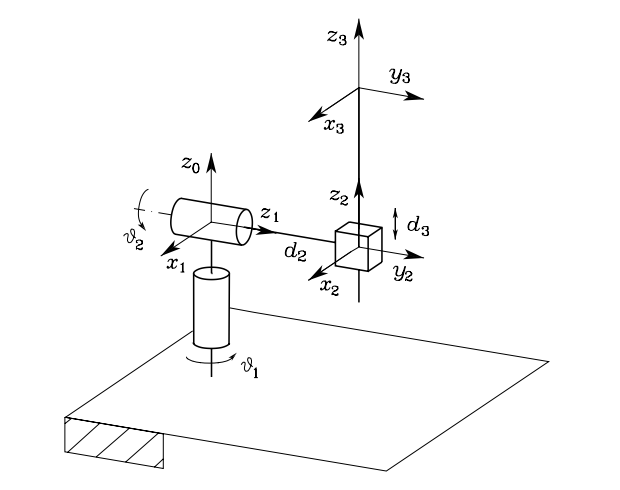

This example considers a spherical arm consisting of two revolute joints followed by a prismatic joint. The link frames follow the standard DH convention.

The frame origins are chosen such that $d_1 = 0$, and the axes $z_1$ and $z_2$ intersect at the origin of Frame 2. The DH parameters are:

| Link | $a_i$ | $\alpha_i$ | $d_i$ | $\theta_i$ |
|------|--------|--------------|--------|--------------|
| 1    | 0      | $-\pi/2$     | 0      | $\theta_1$   |
| 2    | 0      | $\pi/2$      | $d_2$  | $\theta_2$   |
| 3    | 0      | 0            | $d_3$  | 0            |

The homogeneous transformations for each joint are:

$$
A^0_1 =
\begin{bmatrix}
c_1 & 0 & -s_1 & 0 \\
s_1 & 0 & c_1 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}, \quad
A^1_2 =
\begin{bmatrix}
c_2 & 0 & s_2 & 0 \\
s_2 & 0 & -c_2 & 0 \\
0 & 1 & 0 & d_2 \\
0 & 0 & 0 & 1
\end{bmatrix}, \quad
A^2_3 =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & d_3 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

Multiplying these gives the forward kinematics:

$$
T^0_3 =
\begin{bmatrix}
c_1c_2 & -s_1 & c_1s_2 & c_1s_2d_3 - s_1d_2 \\
s_1c_2 & c_1 & s_1s_2 & s_1s_2d_3 + c_1d_2 \\
-s_2 & 0 & c_2 & c_2d_3 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

Here, $q = [\theta_1, \theta_2, d_3]^T$. The prismatic joint $d_3$ affects only the position, not the orientation. Since Frame 3 aligns with the intended end-effector directions, no additional transformation is needed: $T^3_e = I_4$.

In [ ]:
import numpy as np

# Function to compute a single DH transformation matrix
def dh_transform(a, alpha, d, theta):
    return np.array([
        [np.cos(theta), -np.sin(theta)*np.cos(alpha),  np.sin(theta)*np.sin(alpha), a*np.cos(theta)],
        [np.sin(theta),  np.cos(theta)*np.cos(alpha), -np.cos(theta)*np.sin(alpha), a*np.sin(theta)],
        [0,              np.sin(alpha),                np.cos(alpha),               d],
        [0,              0,                            0,                           1]
    ])

# Function to compute forward kinematics from a list of DH parameters and joint variables
def compute_direct_kinematics(dh_params, q):
    T = np.eye(4)
    for i in range(len(q)):
        a, alpha, d, theta_offset = dh_params[i]
        if isinstance(q[i], str) and q[i] == 'prismatic':
            theta = theta_offset
            d_var = d
        else:
            theta = q[i] + theta_offset
            d_var = d
        T_i = dh_transform(a, alpha, d_var, theta)
        T = T @ T_i
    return T

# Joint variables: theta1, theta2 (in radians), d3
theta1 = np.deg2rad(45)
theta2 = np.deg2rad(30)
d3 = 2.0

# DH Parameters: [a, alpha, d, theta_offset]
# For spherical arm:
dh_params = [
    [0, -np.pi/2, 0, 0],      # Joint 1: revolute
    [0, np.pi/2,  1.0, 0],    # Joint 2: revolute, with d2 = 1.0
    [0, 0, d3, 0]             # Joint 3: prismatic
]

# Compute the transformation matrix
T03 = compute_direct_kinematics(dh_params, [theta1, theta2, 'prismatic'])
print("T^0_3:\n", np.round(T03, 4))

T^0_3:
 [[ 0.6124 -0.7071  0.3536  0.    ]
 [ 0.6124  0.7071  0.3536  1.4142]
 [-0.5     0.      0.866   1.7321]
 [ 0.      0.      0.      1.    ]]


---

## 10. Hand-Eye Calibration
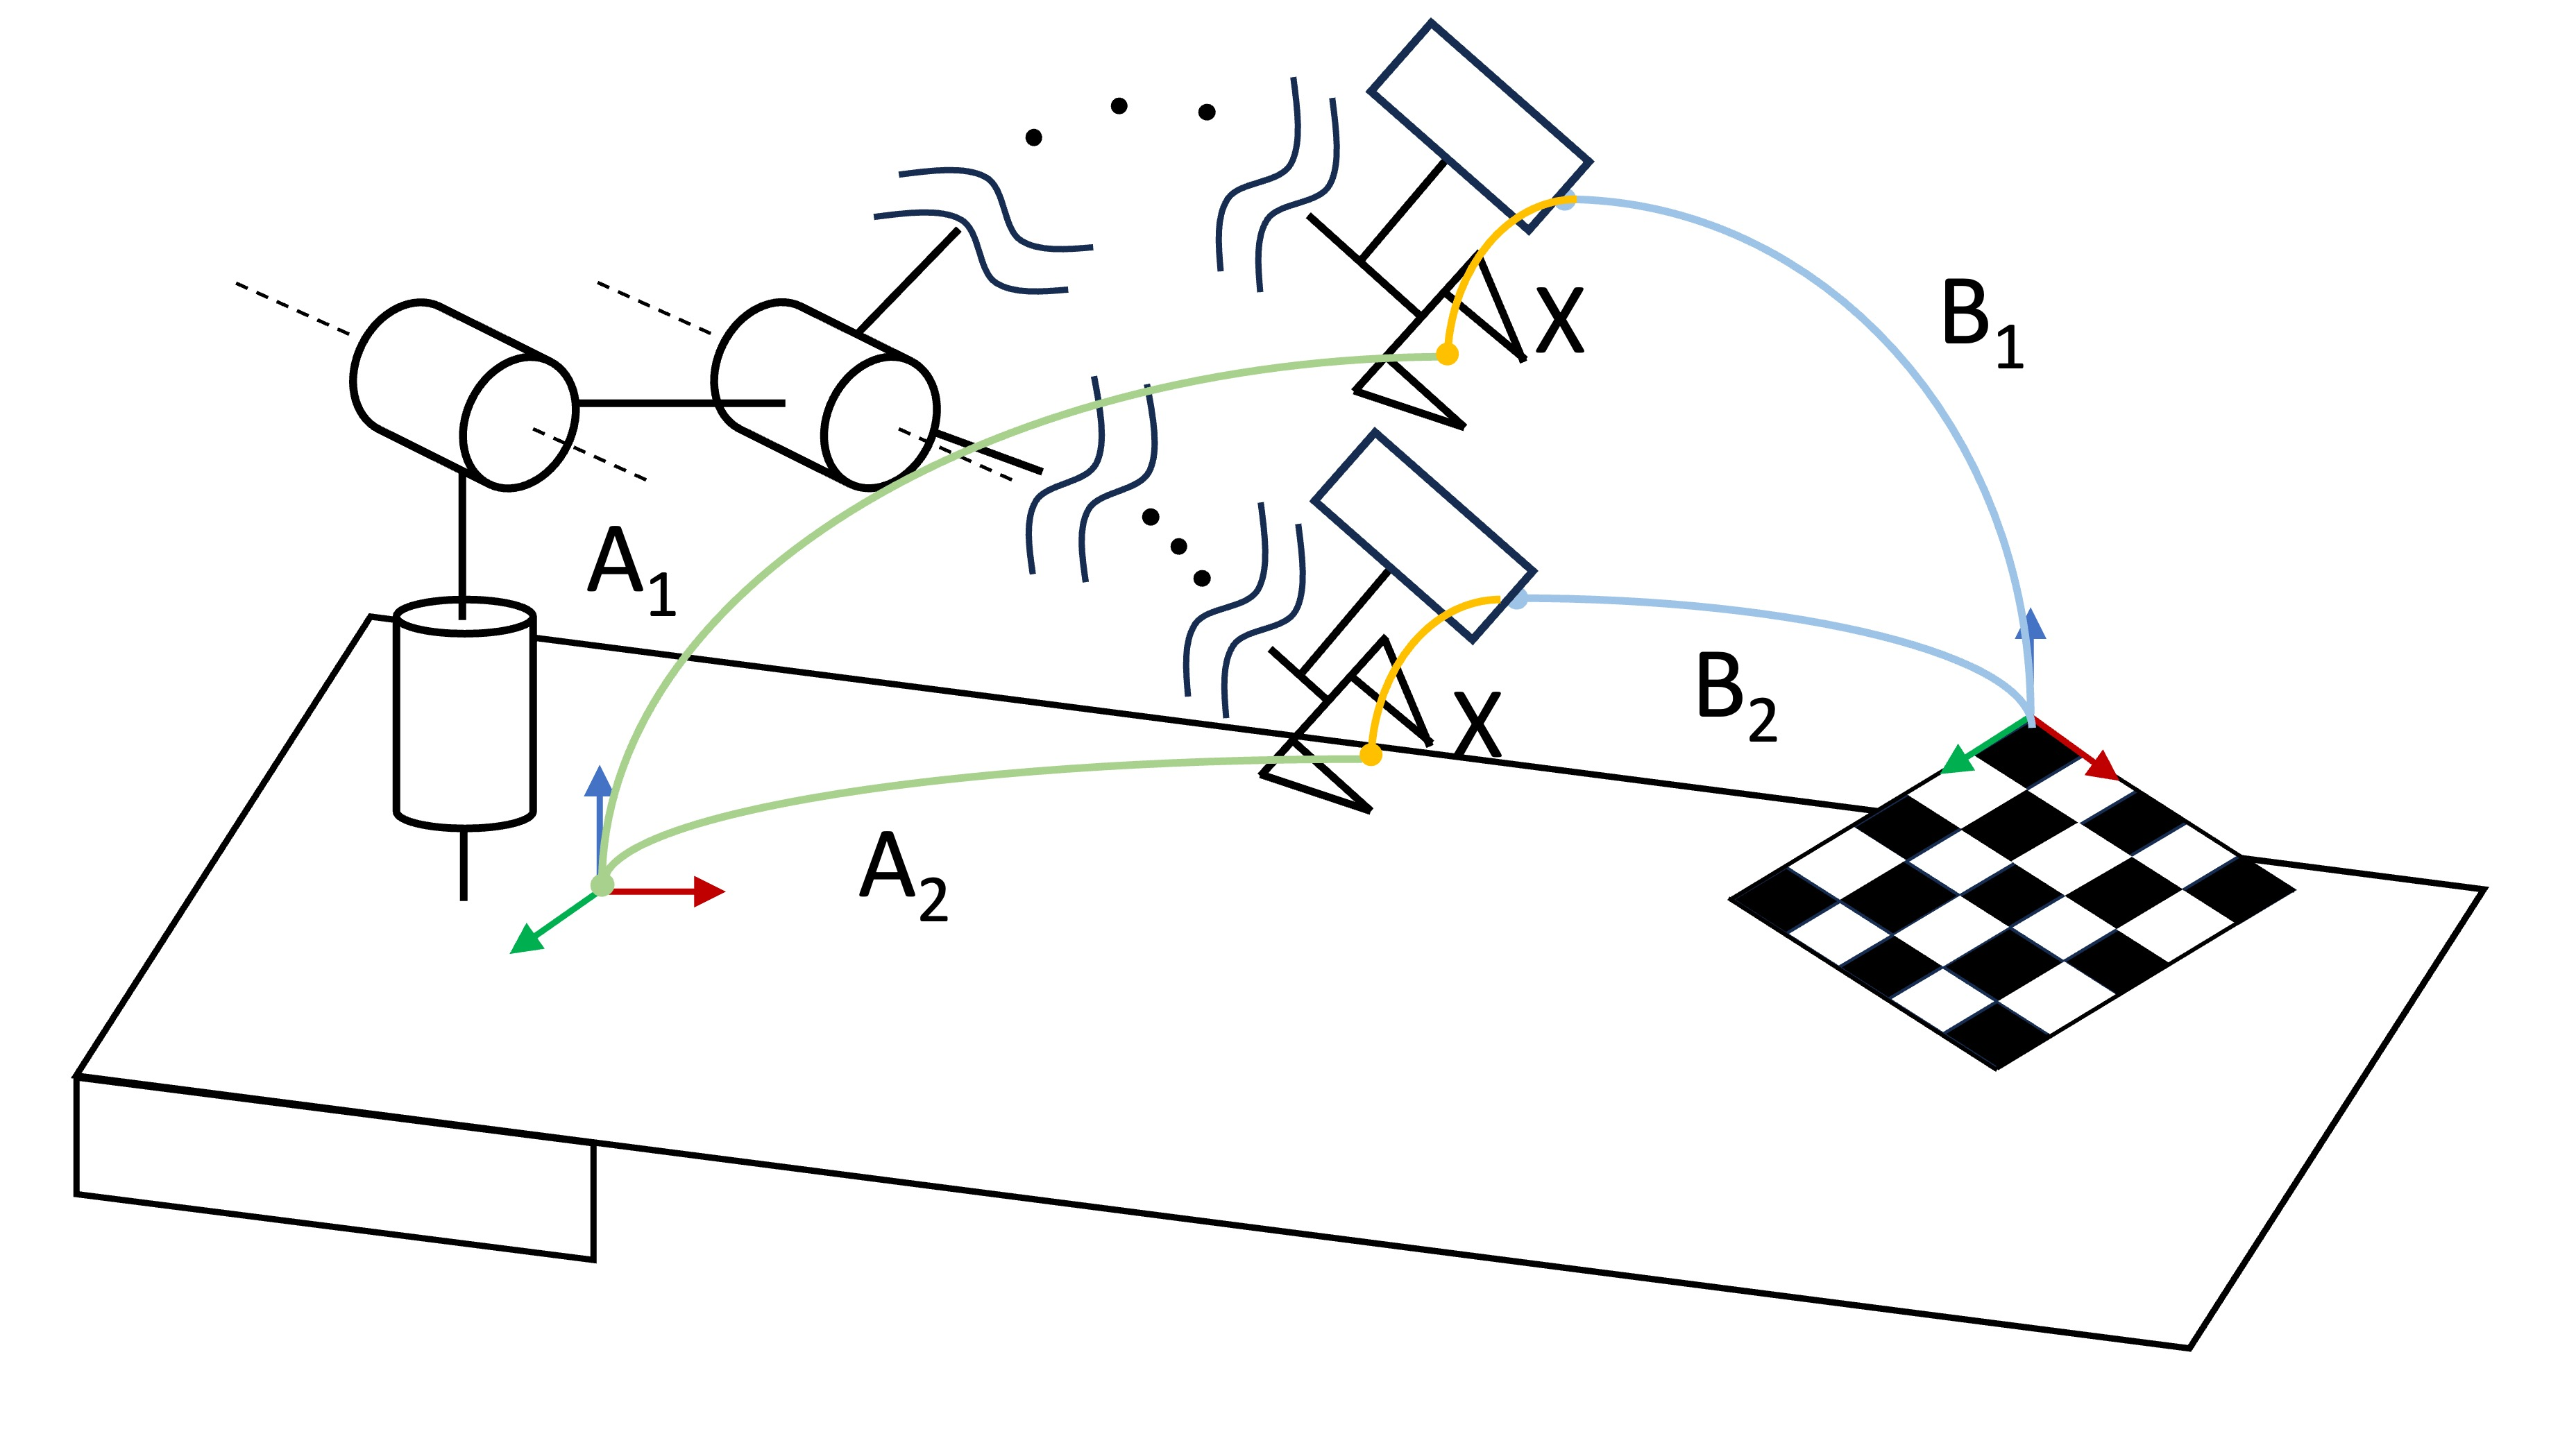

In this final section of the kinematics module, we explore a practical and widely-used application of rigid body transformations: Hand-Eye Calibration. This technique is essential in robotics to determine the fixed spatial transformation between a camera (the "eye") mounted on a robot and the robot's end-effector (the "hand").

The goal is to estimate the constant transformation matrix $X$ from the camera frame to the end-effector frame, given multiple relative motion pairs observed by the robot and the camera:

$$
A_i X = X B_i
$$

Where:

- $A_i$: the relative transformation of the robot's end-effector (from time $t_1$ to $t_2$)

- $B_i$: the corresponding relative transformation of the calibration object observed by the camera

- $X$: the unknown, fixed transformation from camera frame to end-effector frame

This equation expresses that the motion seen by the robot ($A_i$) and the motion seen by the camera ($B_i$) should be consistent when transformed by $X$.


### 10.1 Generate Synthetic Data

To validate our algorithm, we first generate synthetic data. This involves:

- Creating a known, random ground-truth transformation $X_{\text{gt}}$

- Generating a set of random $B_i$ transformations

- Computing the corresponding $A_i$ using the relation:

$$
A_i = X_{\text{gt}} \cdot B_i \cdot X^{-1}_{\text{gt}}
$$

This ensures that the calibration condition is exactly satisfied in the synthetic data.

In [ ]:
import numpy as np
from scipy.spatial.transform import Rotation as R

# Define the ground-truth hand-eye transformation X = [R_gt | t_gt]
pos_gt = np.array([0.05, 0.015, 0.08])  # Translation vector in meters
rotvec_gt = np.array([0.15, -0.24, 0.12])  # Rotation vector in radians
R_gt = R.from_euler('xyz', rotvec_gt).as_matrix()

X_gt = np.eye(4)
X_gt[:3, :3] = R_gt
X_gt[:3, 3] = pos_gt

# Function to generate motion pairs (A_i, B_i)
def generate_motion_pair():
    rotvec = np.random.uniform(-np.pi, np.pi, 3)
    t = np.random.uniform(-0.1, 0.1, 3)
    Rb = R.from_euler('xyz', rotvec).as_matrix()

    B = np.eye(4)
    B[:3, :3] = Rb
    B[:3, 3] = t

    A = X_gt @ B @ np.linalg.inv(X_gt)
    return A, B

# Generate 1000 pairs of (A_i, B_i)
A_list, B_list = zip(*[generate_motion_pair() for _ in range(1000)])

# Print a few samples for verification
np.set_printoptions(precision=4, suppress=True)
print("Ground-truth transformation X_gt:\n", X_gt)
for i in range(3):
    print(f"\nSample A[{i}] Rotation:\n", A_list[i][:3, :3])
    print(f"Sample B[{i}] Rotation:\n", B_list[i][:3, :3])

Ground-truth transformation X_gt:
 [[ 0.9644 -0.1536 -0.2155  0.05  ]
 [ 0.1163  0.9774 -0.1765  0.015 ]
 [ 0.2377  0.1452  0.9604  0.08  ]
 [ 0.      0.      0.      1.    ]]

Sample A[0] Rotation:
 [[-0.6055 -0.1094 -0.7883]
 [ 0.068  -0.994   0.0857]
 [-0.7929 -0.0017  0.6093]]
Sample B[0] Rotation:
 [[-0.9069 -0.1869 -0.3776]
 [ 0.0015 -0.8976  0.4407]
 [-0.4214  0.3991  0.8143]]

Sample A[1] Rotation:
 [[-0.0135  0.9892 -0.1458]
 [-0.06   -0.1463 -0.9874]
 [-0.9981 -0.0045  0.0614]]
Sample B[1] Rotation:
 [[-0.1965  0.9193 -0.341 ]
 [-0.4506 -0.3935 -0.8013]
 [-0.8708 -0.0037  0.4916]]

Sample A[2] Rotation:
 [[-0.3622 -0.8014  0.4759]
 [ 0.1875 -0.5628 -0.805 ]
 [ 0.913  -0.2024  0.3541]]
Sample B[2] Rotation:
 [[-0.1028 -0.7842  0.612 ]
 [ 0.1129 -0.6205 -0.7761]
 [ 0.9883 -0.0106  0.1523]]


## 10.2 Solve for Rotation

### Solving for Rotation in Hand–Eye Calibration

From the hand–eye equation:

$$
A_i X = X B_i
$$

we focus first on the **rotational part**:

$$
R_{A_i} R_X = R_X R_{B_i}
$$

Here, $R_{A_i}$ and $R_{B_i}$ are known rotation matrices from the robot and camera movements, and $R_X$ is the **unknown rotation** that transforms coordinates from the camera to the robot end-effector.

To estimate $R_X$, we collect many motion pairs $(A_i, B_i)$ and look for one fixed rotation matrix that satisfies the relation for all of them. This is similar to finding the best overall alignment between the robot and camera rotations.

We can rearrange the equation to emphasize this idea:

$$
R_{A_i} R_X \approx R_X R_{B_i}
$$

To formalize this across many samples, we define the matrix $M$ as:

$$
M = \sum_{i=1}^{N} R_{A_i} R_{B_i}^T
$$

This matrix summarizes the overall alignment between the robot and camera rotations. The better $R_X$ is, the better this alignment will be.

To extract the best rotation $R_X$, we perform **singular value decomposition (SVD)** on $M$:

$$
M = U \Sigma V^T
$$

Then, we compute:

$$
R_X = U V^T
$$

This gives us a good estimate of the rotation. However, in some cases, due to noise or numerical rounding, the determinant of $R_X$ might be negative — which would indicate a reflection rather than a proper rotation.

To correct this, we check the determinant of the estimated rotation matrix:

$$
\det(R_X) = \det(U V^T) < 0
$$

If this condition is true, we modify the matrix $U$ by flipping the sign of its third column:

$$
U' = [\mathbf{u}_1\ \mathbf{u}_2\ -\mathbf{u}_3]
$$

Then, we recompute the rotation matrix as:

$$
R_X = U' V^T
$$

This ensures that $R_X$ remains a proper rotation matrix with $\det(R_X) = +1$.

Let's check this using the following code.

In [ ]:
import numpy as np
from scipy.spatial.transform import Rotation as R

# Ground-truth rotation (for comparison)
rotvec_gt = np.array([0.15, -0.24, 0.12])  # rotation in radians
R_gt = R.from_euler('xyz', rotvec_gt).as_matrix()

# Compute rotation using SVD
M = np.zeros((3, 3))
for A, B in zip(A_list, B_list):
    RA = A[:3, :3]
    RB = B[:3, :3]
    M += RA @ RB.T

# For simplicity, we use numpy.linalg.svd here.
# For more details, refer to: https://numpy.org/doc/2.2/reference/generated/numpy.linalg.svd.html.
U, _, Vt = np.linalg.svd(M)
RX = U @ Vt

# Ensure a proper rotation (no reflection)
if np.linalg.det(RX) < 0:
    U[:, -1] *= -1
    RX = U @ Vt

# Compute rotation error (Frobenius norm)
rotation_error = np.linalg.norm(R_gt - RX)

# Display results
np.set_printoptions(precision=5, suppress=True)
print("Ground-truth rotation matrix (R_gt):\n", R_gt)
print("\nEstimated rotation matrix (R_X):\n", RX)
print(f"\nRotation error (Frobenius norm): {rotation_error:.6f}")

Ground-truth rotation matrix (R_gt):
 [[ 0.96435 -0.15363 -0.21545]
 [ 0.11628  0.97741 -0.1765 ]
 [ 0.2377   0.14515  0.96043]]

Estimated rotation matrix (R_X):
 [[ 0.96376 -0.16292 -0.21123]
 [ 0.12475  0.97517 -0.18295]
 [ 0.23579  0.14997  0.96016]]

Rotation error (Frobenius norm): 0.015806


Once $R_X$ is known, we proceed to estimate the translation $t_X$ in the next section.

## 10.3 Solve for Translation

Once the rotation matrix $R_X$ is estimated using SVD, we solve for the translation component $t_X$ in the hand–eye calibration equation:

$$
A_i X = X B_i
$$

Using the block matrix form of each transformation:

$$
A_i =
\begin{bmatrix}
R_{A_i} & t_{A_i} \\
0 & 1
\end{bmatrix},
\quad
B_i =
\begin{bmatrix}
R_{B_i} & t_{B_i} \\
0 & 1
\end{bmatrix},
\quad
X =
\begin{bmatrix}
R_X & t_X \\
0 & 1
\end{bmatrix}
$$

Substituting into the equation and comparing the translation part, we get:

$$
R_{A_i} t_X + t_{A_i} = R_X t_{B_i} + t_X
$$

Rearranging terms:

$$
(R_{A_i} - I) t_X = -t_{A_i} + R_X t_{B_i}
$$

We stack this equation for all motion pairs into a single linear system:

$$
A_{\text{mat}} \cdot t_X = b_{\text{vec}}
$$

Where:

- Each row block of $A_{\text{mat}}$ is $R_{A_i} - I$
- Each corresponding block of $b_{\text{vec}}$ is $R_X t_{B_i} - t_{A_i}$

We solve for $t_X$ using least squares.

In [ ]:
import numpy as np

I = np.eye(3)
A_mat = []
b_vec = []

# Use previously estimated RX
for A, B in zip(A_list, B_list):
    RA, tA = A[:3, :3], A[:3, 3]
    RB, tB = B[:3, :3], B[:3, 3]

    A_block = RA - I
    b_block = RX @ tB - tA

    A_mat.append(A_block)
    b_vec.append(b_block)

# Stack into full linear system
A_mat = np.concatenate(A_mat, axis=0)
b_vec = np.concatenate(b_vec, axis=0)

# Solve for translation using least squares
tX, _, _, _ = np.linalg.lstsq(A_mat, b_vec, rcond=None)

# Display estimated translation
print("Estimated translation vector (tX):")
print(tX)

# Ground-truth comparison
print("\nGround truth translation vector (t_gt):")
print(pos_gt)

# Compute translation error
translation_error = np.linalg.norm(tX - pos_gt)
print(f"\nTranslation error: {translation_error:.6f}")

Estimated translation vector (tX):
[0.05001 0.01497 0.08001]

Ground truth translation vector (t_gt):
[0.05  0.015 0.08 ]

Translation error: 0.000035


This solution yields the optimal translation $t_X$ that is consistent with all observed motion pairs, given the estimated rotation $R_X$.

## 10.4 Summary

By combining the estimated rotation matrix $R_X$ and translation vector $t_X$, we obtain the full hand–eye transformation matrix:

$$
X =
\begin{bmatrix}
R_X & t_X \\
0 & 1
\end{bmatrix}
$$

We compare this estimate $X_{\text{est}}$ with the ground-truth transformation $X_{\text{gt}}$ used to generate the synthetic data, and compute both the rotation and translation errors.

In [ ]:
# Combine estimated R and t into full transformation
X_est = np.eye(4)
X_est[:3, :3] = RX
X_est[:3, 3] = tX

# Ground-truth transformation (already defined as X_gt)

# Compute errors
rotation_error = np.linalg.norm(R_gt - RX)
translation_error = np.linalg.norm(pos_gt - tX)

# Display full results
np.set_printoptions(precision=4, suppress=True)
print("Ground-truth transformation X_gt:\n", X_gt)
print("\nEstimated transformation X_est:\n", X_est)
print(f"\nRotation error (Frobenius norm): {rotation_error:.6f}")
print(f"Translation error (L2 norm): {translation_error:.6f}")

Ground-truth transformation X_gt:
 [[ 0.9644 -0.1536 -0.2155  0.05  ]
 [ 0.1163  0.9774 -0.1765  0.015 ]
 [ 0.2377  0.1452  0.9604  0.08  ]
 [ 0.      0.      0.      1.    ]]

Estimated transformation X_est:
 [[ 0.9629 -0.1556 -0.2205  0.05  ]
 [ 0.1179  0.9774 -0.1753  0.015 ]
 [ 0.2428  0.1428  0.9595  0.08  ]
 [ 0.      0.      0.      1.    ]]

Rotation error (Frobenius norm): 0.008273
Translation error (L2 norm): 0.000018


This confirms how accurately the estimated transformation matches the true configuration. A small error indicates successful calibration.

You can experiment further by changing the number of motion pairs, the motion scale, or adding noise to simulate real-world conditions.

---

## 11. Conclusion

This exercise consolidates everything we've learned about coordinate transformations, rotation matrix algebra, and homogeneous representations in kinematics. Hand-eye calibration is a practical and highly applicable example of these theoretical tools.

---